# MODEL BASELINE
## In this notebook we will be building a logistic regression model
*  We will be using the logistic model as a baseline model to checkmate the performance of other model we will be using in getting at our final model.
> FLOW
>>
>> Having know that our data is still imbalance despite the feature engineering, to ensure that this those not affect the performance of our model our train data will be splitted into train and validation set using ```stratifiedshufflesplit``` to ensure there are equal representation of each of the class to be predicted in our train and validation set.
>>
>> The train set is further augmented for class balance using the ```randomoversampler``` this is to ensure that our model is not just craming the train set and to avoid over generalization
>>
>> After this we train our model on the train set and evaluate it on the validation set using confusion matrix
>>
>> We are also interested in understanding the contribution of each features in our model
>>
> **Note this workflow is applicable to all the other models**

In [269]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-dark")

In [270]:
df = pd.read_csv(r"F:\my awesome streamlit front end\subAfricaDf.csv")

In [271]:
df.head()

,Year,Month,Day,Country,State,City,Region,Region_name,duration_of_incident,AttackType,...,Summary,Group,Latitude,Longitude,Target_type,Weapon_type,sub_weapon_type,Suicide,Casualities,Success
0,1970,1,11,Ethiopia,Unknown,Unknown,11,Sub-Saharan Africa,0,Unknown,...,NaN,Eritrean Liberation Front,NaN,NaN,Military,Unknown,NaN,0,1.0,1
1,1970,3,14,Ethiopia,Unknown,Unknown,11,Sub-Saharan Africa,1,Hostage Taking (Kidnapping),...,NaN,Eritrean Liberation Front,NaN,NaN,Journalists & Media,Unknown,NaN,0,0.0,1
2,1970,4,0,Ethiopia,Unknown,Unknown,11,Sub-Saharan Africa,1,Hostage Taking (Kidnapping),...,NaN,Eritrean Liberation Front,NaN,NaN,Government (Diplomatic),Unknown,NaN,0,0.0,1
3,1971,1,15,Zambia,Unknown,Unknown,11,Sub-Saharan Africa,0,Hostage Taking (Kidnapping),...,NaN,Revolutionary Committee of Mozambique (COREMO),NaN,NaN,Government (General),Unknown,NaN,0,1.0,1
4,1971,1,22,Ethiopia,Amhara,Bahar Dar,11,Sub-Saharan Africa,0,Hijacking,...,NaN,Eritrean Liberation Front,11.583513,37.397019,Airports & Aircraft,Unknown,NaN,0,0.0,1


In [272]:
df = df[["Country", "State", "AttackType", "Target_type", "Group","Weapon_type","Success"]]
df.head()

,Country,State,AttackType,Target_type,Group,Weapon_type,Success
0,Ethiopia,Unknown,Unknown,Military,Eritrean Liberation Front,Unknown,1
1,Ethiopia,Unknown,Hostage Taking (Kidnapping),Journalists & Media,Eritrean Liberation Front,Unknown,1
2,Ethiopia,Unknown,Hostage Taking (Kidnapping),Government (Diplomatic),Eritrean Liberation Front,Unknown,1
3,Zambia,Unknown,Hostage Taking (Kidnapping),Government (General),Revolutionary Committee of Mozambique (COREMO),Unknown,1
4,Ethiopia,Amhara,Hijacking,Airports & Aircraft,Eritrean Liberation Front,Unknown,1


count of successful attacks and not successful attacks 
 1    16277
0     1273
Name: Success, dtype: int64



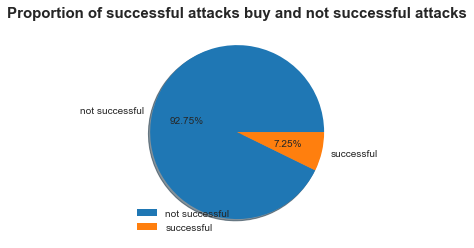

In [273]:
# Checking for class balance
plt.pie(df["Success"].value_counts(normalize=True), labels=[ "not successful", "successful"], 
        shadow=True, autopct="%1.2f%%")
plt.title("Proportion of successful attacks buy and not successful attacks", size=15, weight="bold");
plt.legend(loc="lower left");
print("count of successful attacks and not successful attacks \n", df["Success"].value_counts(), end="\n\n")

In [274]:
np.round((df.isna().sum()/df.shape[0])*100, 2) # Representing the missing values as percentage of the overall number of items in the columns

Country        0.00
State          0.05
AttackType     0.00
Target_type    0.00
Group          0.00
Weapon_type    0.00
Success        0.00
dtype: float64

In [275]:
df = df.dropna()
df.isnull().sum()

Country        0
State          0
AttackType     0
Target_type    0
Group          0
Weapon_type    0
Success        0
dtype: int64

In [276]:
df['Country'].value_counts()

Somalia                             4142
Nigeria                             3907
South Africa                        2016
Sudan                                967
Democratic Republic of the Congo     775
Kenya                                683
Burundi                              613
Mali                                 566
Angola                               499
Uganda                               394
Mozambique                           363
Cameroon                             332
Central African Republic             283
South Sudan                          225
Ethiopia                             190
Rwanda                               159
Namibia                              151
Niger                                146
Senegal                              118
Zimbabwe                             101
Sierra Leone                         101
Chad                                  91
Rhodesia                              83
Ivory Coast                           74
Zambia          

In [277]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [278]:
country_map = shorten_categories(df.Country.value_counts(), 50)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Somalia                             4142
Nigeria                             3907
South Africa                        2016
Sudan                                967
Democratic Republic of the Congo     775
Kenya                                683
Burundi                              613
Mali                                 566
Angola                               499
Uganda                               394
Mozambique                           363
Other                                340
Cameroon                             332
Central African Republic             283
South Sudan                          225
Ethiopia                             190
Rwanda                               159
Namibia                              151
Niger                                146
Senegal                              118
Zimbabwe                             101
Sierra Leone                         101
Chad                                  91
Rhodesia                              83
Ivory Coast     

In [279]:
df.State.value_counts()

Banaadir          1613
Borno             1423
Gauteng            862
Lower Shebelle     579
Unknown            539
                  ... 
Asmara               1
Ali Sabieh           1
Cacheu               1
Lacs                 1
Western Lakes        1
Name: State, Length: 464, dtype: int64

In [280]:
state_map = shorten_categories(df.State.value_counts(), 100)
df['State'] = df['State'].map(state_map)
df.State.value_counts()

Other               5653
Banaadir            1613
Borno               1423
Gauteng              862
Lower Shebelle       579
Unknown              539
KwaZulu-Natal        513
North Kivu           413
Lower Juba           341
Bay                  328
North Darfur         300
Bujumbura Mairie     276
Hiiraan              272
Extreme-North        255
Yobe                 253
Gedo                 246
Benue                213
Northern             212
Adamawa              208
South Darfur         203
Western Cape         195
Plateau              188
Rivers               184
Kaduna               169
Delta                168
Kano                 154
Bari                 142
Mudug                139
Middle Shebelle      138
Orientale            138
Eastern Cape         133
Kidal                132
Central              130
Gao                  129
Timbuktu             127
Galguduud            123
Bayelsa              122
North Eastern        111
Bakool               110
Mandera              108


In [281]:
df.AttackType.unique()

array(['Unknown', 'Hostage Taking (Kidnapping)', 'Hijacking',
       'Assassination', 'Bombing/Explosion', 'Armed Assault',
       'Facility/Infrastructure Attack',
       'Hostage Taking (Barricade Incident)', 'Unarmed Assault'],
      dtype=object)

In [282]:
df.Target_type.unique()

array(['Military', 'Journalists & Media', 'Government (Diplomatic)',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Private Citizens & Property', 'Transportation',
       'Violent Political Party', 'Educational Institution', 'Police',
       'Utilities', 'Religious Figures/Institutions', 'Tourists',
       'Unknown', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Maritime', 'Terrorists/Non-State Militia', 'Other'], dtype=object)

In [283]:
df.Group.value_counts()

Unknown                                     6055
Al-Shabaab                                  3288
Boko Haram                                  2418
African National Congress (South Africa)     606
Fulani extremists                            511
                                            ... 
Al-Gama'at al-Islamiyya (IG)                   1
National Redemption Front                      1
Rally of Democratic Forces (RAFD)              1
Tribal Clash                                   1
Rastas                                         1
Name: Group, Length: 492, dtype: int64

In [284]:
group_map = shorten_categories(df.Group.value_counts(), 50)
df['Group'] = df['Group'].map(group_map)
df.Group.value_counts()

Unknown                                                        6055
Al-Shabaab                                                     3288
Boko Haram                                                     2418
Other                                                          1893
African National Congress (South Africa)                        606
Fulani extremists                                               511
National Union for the Total Independence of Angola (UNITA)     432
Lord's Resistance Army (LRA)                                    322
Mozambique National Resistance Movement (MNR)                   311
Allied Democratic Forces (ADF)                                  216
Janjaweed                                                       213
Hutu extremists                                                 167
Sudan People's Liberation Movement in Opposition (SPLM-IO)      101
Democratic Front for the Liberation of Rwanda (FDLR)             99
Movement for the Emancipation of the Niger Delta

In [285]:
df.Group.unique()

array(['Other', 'Unknown',
       "South-West Africa People's Organization (SWAPO)",
       'African National Congress (South Africa)',
       'National Union for the Total Independence of Angola (UNITA)',
       'Mozambique National Resistance Movement (MNR)',
       'Inkatha Freedom Party (IFP)',
       'Movement of Democratic Forces of Casamance', 'Hutu extremists',
       'Revolutionary United Front (RUF)', "Lord's Resistance Army (LRA)",
       'Allied Democratic Forces (ADF)', 'Mayi Mayi', 'Fulani extremists',
       'Janjaweed',
       'Movement for the Emancipation of the Niger Delta (MEND)',
       'Democratic Front for the Liberation of Rwanda (FDLR)',
       'Muslim extremists', 'Al-Shabaab',
       'Al-Qaida in the Islamic Maghreb (AQIM)', 'Boko Haram',
       "Sudan People's Liberation Movement - North",
       'Movement for Oneness and Jihad in West Africa (MUJAO)',
       'Ansar al-Dine (Mali)', 'Anti-Balaka Militia',
       "Sudan People's Liberation Movement in Opposit

In [286]:
df.Weapon_type.value_counts()

Firearms                                                                       7495
Explosives                                                                     6318
Unknown                                                                        2368
Incendiary                                                                      840
Melee                                                                           478
Other                                                                            19
Chemical                                                                         12
Sabotage Equipment                                                                7
Biological                                                                        3
Fake Weapons                                                                      1
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       1
Name: Weapon_type, dtype: int64

In [287]:
weapon_map = shorten_categories(df.Weapon_type.value_counts(), 50)
df['Weapon_type'] = df['Weapon_type'].map(weapon_map)
df.Weapon_type.value_counts()

Firearms      7495
Explosives    6318
Unknown       2368
Incendiary     840
Melee          478
Other           43
Name: Weapon_type, dtype: int64

In [288]:
df.Weapon_type.unique()

array(['Unknown', 'Explosives', 'Firearms', 'Incendiary', 'Melee',
       'Other'], dtype=object)

In [289]:
X = df.drop("Success", axis=1)
y = df["Success"]

In [290]:
cat_cols=['Group','State','Weapon_type','Country','AttackType','Target_type']

le=LabelEncoder()

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [291]:
# Splitting our data into train and validation set, with 80% used for training and 20% for validation
sss = StratifiedShuffleSplit(n_splits= 100, test_size=0.2, random_state=2)
for train_index, val_index in sss.split(X, y):
    X_train, y_train = X.copy().iloc[train_index], y.copy().iloc[train_index]
    X_val, y_val = X.copy().iloc[val_index], y.copy().iloc[val_index]

### DEALING WITH IMBALANCE
* As it has been pointed out earlier that our data is imbalance we train and up scale the class with less count which in the case is class 1 and the approach taken is to scale the train set to 13,000 from 1018

In [292]:
print("Initial state of class before augmenting\n", y_train.value_counts(), end="\n\n") # Checking the class count of train set before augmentation

resampler = RandomOverSampler(sampling_strategy={0:13000, 1:13015}, random_state=2)
X_res, y_res = resampler.fit_resample(X_train, y_train)

print("Final state of class after augmenting\n", y_res.value_counts()) # Checking the class count of train set before augmentation

Initial state of class before augmenting
 1    13015
0     1018
Name: Success, dtype: int64

Final state of class after augmenting
 1    13015
0    13000
Name: Success, dtype: int64


### BUILDING MODEL


In [293]:
classifier1=RandomForestClassifier(class_weight="balanced", random_state=2)
classifier1.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', random_state=2)

In [294]:
# Splitting our data into train and validation set, with 80% used for training and 20% for validation
sss = StratifiedShuffleSplit(n_splits= 100, test_size=0.2, random_state=2)
for train_index, val_index in sss.split(X_res, y_res):
    X1_train, y1_train = X_res.copy().iloc[train_index], y_res.copy().iloc[train_index]
    X1_val, y1_val = X_res.copy().iloc[val_index], y_res.copy().iloc[val_index]

### MODEL EVALUATION
* The model is evaluated using precision, recall, f1 score and accuracy which is as display below
* The model is evaluation not only on the validation set but also on the train set this is to check that our model is not overfitting
* Also, the performance of our model can also be visualized as shown below

In [295]:
# Evaluating on the validation set
print(classification_report(y_val, classifier1.predict(X_val)))

              precision    recall  f1-score   support

           0       0.18      0.52      0.26       255
           1       0.96      0.81      0.88      3254

    accuracy                           0.79      3509
   macro avg       0.57      0.67      0.57      3509
weighted avg       0.90      0.79      0.83      3509



In [296]:
# Evaluating on the train set
print(classification_report(y_train, classifier1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.31      0.94      0.46      1018
           1       0.99      0.83      0.91     13015

    accuracy                           0.84     14033
   macro avg       0.65      0.89      0.68     14033
weighted avg       0.94      0.84      0.87     14033



In [297]:
# Evaluating on the validation set
print(classification_report(y1_val, classifier1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2600
           1       0.94      0.83      0.88      2603

    accuracy                           0.89      5203
   macro avg       0.90      0.89      0.89      5203
weighted avg       0.90      0.89      0.89      5203



In [298]:
# Evaluating on the train set
print(classification_report(y1_train, classifier1.predict(X1_train)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     10400
           1       0.94      0.83      0.88     10412

    accuracy                           0.89     20812
   macro avg       0.90      0.89      0.89     20812
weighted avg       0.90      0.89      0.89     20812



In [299]:
X_res

,Country,State,AttackType,Target_type,Group,Weapon_type
0,20,32,6,12,2,5
1,20,23,0,12,2,1
2,24,32,0,6,27,3
3,14,7,2,18,6,0
4,20,17,0,8,2,0
...,...,...,...,...,...,...
26010,14,5,1,12,27,1
26011,14,7,0,12,6,0
26012,6,32,8,8,22,5
26013,14,39,2,18,6,0


### ATTACK PREDICTIVE SYSTEM

In [300]:
X = ["Ethiopia", 'Unknown','Hostage Taking (Kidnapping)','Journalists & Media','Boko Haram','Unknown']
X_n = le.fit_transform(X)
X_n = np.array(X_n).reshape(1, -1)

In [301]:
prediction = classifier1.predict(X_n)
print(prediction)

if (prediction[0] == 0):
    print('The attack is not successful')
else:
    print('The attack is successful')

[1]
The attack is successful


In [302]:
import pickle

In [303]:
dict_filename = 'Modified1_AA_LLC.pkl'
data = {"model":classifier1 , "le":le}
with open('Modified1_AA_LLC.pkl', 'wb') as file:
    pickle.dump(data, file)

In [304]:
model = data["model"]

In [305]:
X = ["Ethiopia", 'Unknown','Hostage Taking (Kidnapping)','Journalists & Media','Boko Haram','Unknown']
X_n = le.fit_transform(X)
X_n = np.array(X_n).reshape(1, -1)

In [306]:
prediction = model.predict(X_n)
#print(prediction)

if (prediction[0] == 0):
    print('The attack is not successful')
else:
    print('The attack is successful')

The attack is successful
